# Assignment


In [4]:
import pandas as pd

In [2]:
df = pd.read_csv('players_22.csv')

C:\Users\workf\AppData\Local\Temp\ipykernel_16888\3399434548.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('players_22.csv')


In [3]:
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age  ...   lcb    cb   rcb  \
0       93         93   78000000.0  320000.0   34  ...  50+3  50+3  50+3   
1       92         92  119500000.0  270000.0   32  ...  60+3  60+3  60+3   
2       91         91   45000000.0  270000.0   36  ...  53+3  53+3  53+3   
3       91         91  129000000.0  270000.0   29  ...  50+3  50+3  50+3   
4       91         91  125500000.0  350000.0   30  ...  69+3  69+3  69+3   

     rb    gk                                    player_face_url  \
0  61+3  19+3  https://cdn.sofifa.net/players/158/023/22_120.png   
1  61+3  19+3  https://cdn.sofifa.net/players/188/545/22_120.png   
2  60+3  20+3  https://cdn.sofifa.net/players/020/801/22_120.png   
3  62+3  20+3  https://cdn.sofifa.net/players/190/871/22_120.png   
4  75+3  21+3  https://cdn.sofifa.net/players/192/985/22_120.png   

                            club_logo_url  \
0  https://cdn.sofifa.net/teams/73/60.png   
1  https://cdn.sofifa.net/teams/21/60.png   
2  https://cdn.sofifa.net/teams/11/60.png   
3  https://cdn.sofifa.net/teams/73/60.png   
4  https://cdn.sofifa.net/teams/10/60.png   

                             club_flag_url  \
0      https://cdn.sofifa.net/flags/fr.png   
1      https://cdn.sofifa.net/flags/de.png   
2  https://cdn.sofifa.net/flags/gb-eng.png   
3      https://cdn.sofifa.net/flags/fr.png   
4  https://cdn.sofifa.net/flags/gb-eng.png   

                            nation_logo_url  \
0  https://cdn.sofifa.net/teams/1369/60.png   
1  https://cdn.sofifa.net/teams/1353/60.png   
2  https://cdn.sofifa.net/teams/1354/60.png   
3                                       NaN   
4  https://cdn.sofifa.net/teams/1325/60.png   

                       nation_flag_url  
0  https://cdn.sofifa.net/flags/ar.png  
1  https://cdn.sofifa.net/flags/pl.png  
2  https://cdn.sofifa.net/flags/pt.png  
3  https://cdn.sofifa.net/flags/br.png  
4  https://cdn.sofifa.net/flags/be.png  

[5 rows x 110 columns]

Well, not everyone plays football or knows everything about it, so i will write some clarifications.

In football, player positions corresponds to these positions:-

![](https://www.fifplay.com/img/public/positions.jpg)

In this dataset, you have 1 row each for every football player in the game FIFA 22, For every player we have :-
- Name
- Weight
- Height
- Salary
- Overall (This is an overall score of how good the player is)
- Potential (In FIFA, if you play career mode, players evolve and their overall scores improve, potential refers to how good a player can get, not what he is currently)

Then we have most other options like:-
- Heading (How well can the player head the ball)
- Standing tackle (How well can the player do a standing tackle - defense)
- Sliding tackle (How well can the player do a sliding tackle - defense)

And many many more

# Question 

This dataset is very rich, meaning you can get a lot of insights from this data. 

So, i have 2 questions for you. 
1. Open ended
    - Give me some insights from this data. (Totally open ended, dazzle me with your brilliance ^_^ )
2. You are hired by Real Madrid, and they want you to scout the best players possible
    - They are looking young players, not over 26
    - They are looking for 4 players
        - 1 for Goalkeeper 
        - 1 Defender (Could be any position)
        - 1 Midfielder (Could be any position)
        - 1 Attacker (Could be any position)
        


![](https://media.tenor.com/GFVJq3zf6GYAAAAC/dazzle-me-virgil-van-cleef.gif)

In [5]:
import numpy as np 
import seaborn as sns
import math

In [26]:
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [52]:
from wordcloud import WordCloud

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [14]:
pp = df['player_positions'].value_counts().head(10)

In [16]:
pp

CB         2423
GK         2132
ST         1770
CDM, CM     953
CM          726
CM, CDM     687
LB          616
RB          576
CB, RB      295
CDM         294
Name: player_positions, dtype: int64

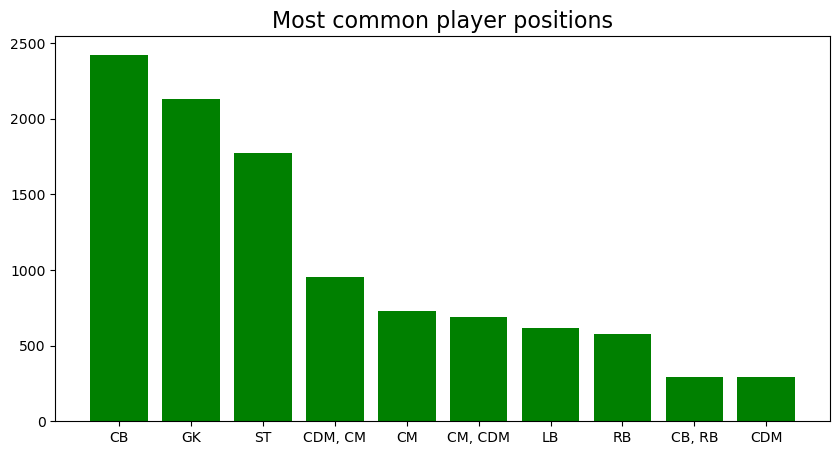

In [71]:
player_pos_count = pp.values
player_pos = pp.index
plt.figure(figsize= (10,5))
plt.bar(player_pos,player_pos_count,color = 'green')
plt.title('Most common player positions', fontsize=16)
plt.show()

Center back is the most common player position.

There are maximum players who play as GoalKeeper and Striker.

Very few player plays on center back,Right back position and Central Defensive Midfielder.

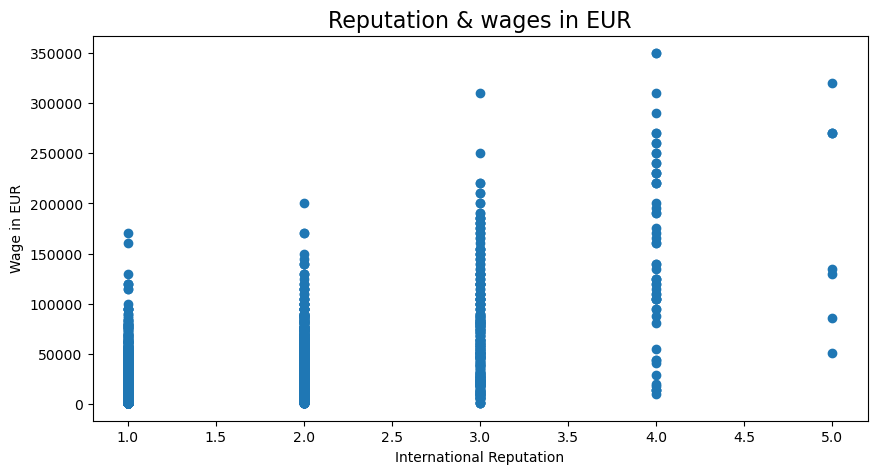

In [73]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(data = df, x= 'international_reputation', y='wage_eur')
plt.xlabel("International Reputation") 
plt.ylabel("Wage in EUR")
plt.title("Reputation & wages in EUR", fontsize = 16)
plt.show()

International reputation plays important role in wages of the player

In [19]:
df_skill = df[df.skill_moves == 5]
df_skill['nationality_name'].value_counts()

Brazil                 12
Portugal                6
France                  6
Argentina               6
England                 2
Morocco                 2
Colombia                2
Congo DR                2
Ukraine                 1
Republic of Ireland     1
Thailand                1
Gambia                  1
Romania                 1
Germany                 1
Switzerland             1
Mexico                  1
Norway                  1
Côte d'Ivoire           1
Slovenia                1
Sweden                  1
Netherlands             1
Algeria                 1
Spain                   1
Scotland                1
Name: nationality_name, dtype: int64

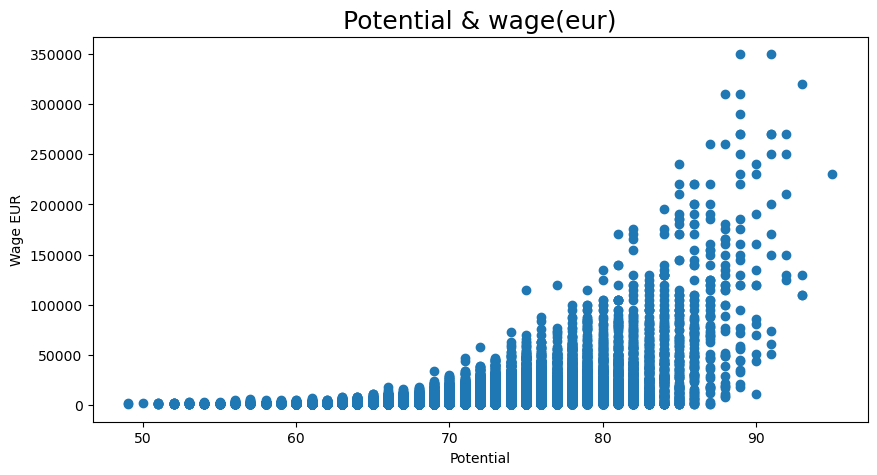

In [74]:
plt.figure(figsize = (10,5))
plt.scatter(data = df, x = 'potential',y = 'wage_eur')
plt.xlabel("Potential") 
plt.ylabel("Wage EUR")
plt.title("Potential & wage(eur)", fontsize = 18)
plt.show()

We can observe, the wages are dense where the potential is high.

In [23]:
df['age'].corr(df['international_reputation'])

0.2319271403175698

In [75]:
fig = px.scatter(df, x="age", y="potential",hover_data = ["international_reputation"], title='Age Vs. Potential')
fig.show()

Players between age 16 to 43 has highest potential.

After the age of 36, the potential has been observed medium to low

In [76]:
fig = px.scatter(df, x="age", y="skill_moves",title='Age Vs.Skill moves')
fig.show()

Skill moves are almost equally distributed from age 16 to 40


In [84]:
fig = px.scatter(df, x="age", y="wage_eur", title='Age Vs. Wages')
fig.show()

Players with Age 26 between 36 earns highest wages.



In [77]:
fig = px.scatter(df, x="age", y='mentality_aggression',title='Age Vs.Mentality aggression')
fig.show()

Mentality Agression is not dependent on age.

In [82]:
fig = px.scatter(df, x="potential", y="defending", title='Potential vs. Defending Skills')
fig.show()

Potential and defending skills are highly correlated.



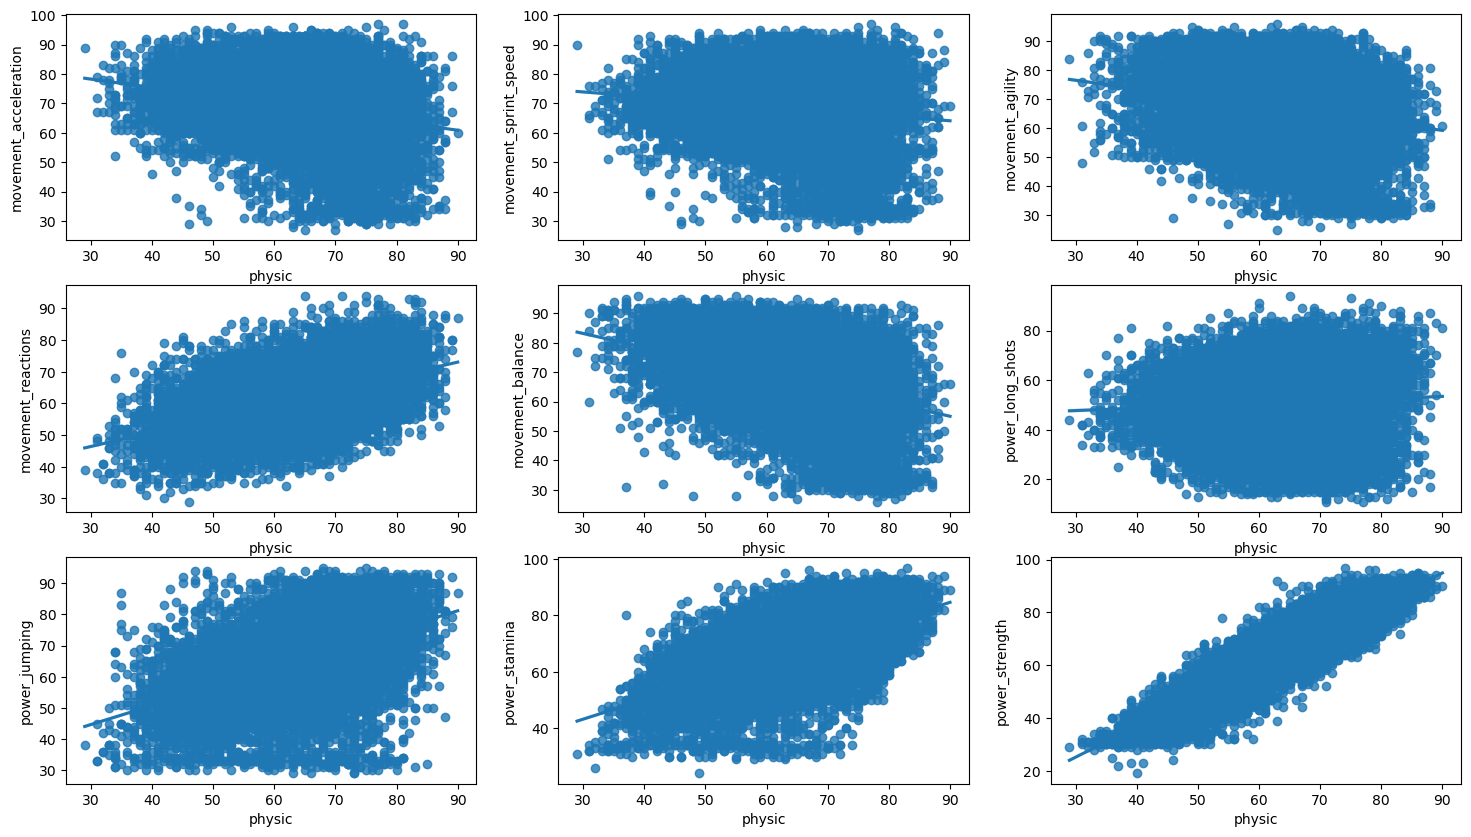

In [78]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))

sns.regplot(ax=axes[0, 0], data=df, x='physic', y='movement_acceleration')
sns.regplot(ax=axes[0, 1], data=df, x='physic', y='movement_sprint_speed')
sns.regplot(ax=axes[0, 2], data=df, x='physic', y='movement_agility')
sns.regplot(ax=axes[1, 0], data=df, x='physic', y='movement_reactions')
sns.regplot(ax=axes[1, 1], data=df, x='physic', y='movement_balance')
sns.regplot(ax=axes[1, 2], data=df, x='physic', y='power_long_shots')
sns.regplot(ax=axes[2, 0], data=df, x='physic', y= 'power_jumping')
sns.regplot(ax=axes[2, 1], data=df, x='physic', y='power_stamina')
sns.regplot(ax=axes[2, 2], data=df, x='physic', y='power_strength')

plt.show()

Movement Reactions, Power Jumping, Power stamina, Power Strength aee positively correlated with Physic of the player.

Movement Acceleration, Movement Sprint Speed, Movement Agility, Movement Balance and Power Long Shots are negatively correlated with Physic of the player.

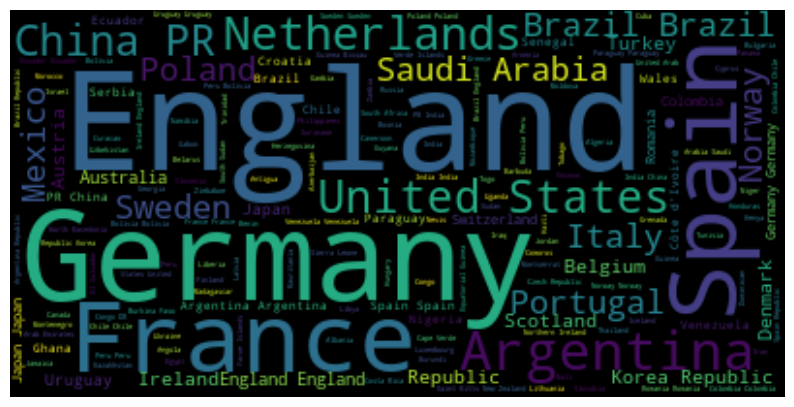

In [79]:
nationality_name = " ".join(n for n in df['nationality_name'])
plt.figure(figsize=(10, 10)) 
wc = WordCloud().generate(nationality_name) 
plt.imshow(wc, interpolation='bilinear') 
plt.axis('off') 
plt.show()

England, Germany, France, Spain and Argentina has highest presentation in year 2022

England, Germany, France, Spain and Argentina has highest presentation in year 2022

In [56]:
players = df.sort_values(by='overall',ascending=False)[["short_name","overall","player_positions", "age", ]]

In [59]:
players['age'].value_counts()

21    1547
22    1446
24    1442
25    1394
23    1387
20    1377
27    1200
26    1197
29    1178
28    1129
19    1099
30     901
31     825
18     733
32     634
33     468
34     354
17     271
35     258
36     146
37     105
38      62
39      39
16      20
40      14
41       7
43       3
42       2
54       1
Name: age, dtype: int64

In [80]:
players[players['age'] <= 26][["short_name","player_positions","overall", "age"]].head(10)

short_name player_positions  overall  age
6             K. Mbappé           ST, LW       91   22
21        G. Donnarumma               GK       89   22
19           J. Kimmich          CDM, RB       89   26
29           E. Haaland               ST       88   20
28      Bruno Fernandes              CAM       88   26
27          R. Sterling           LW, RW       88   26
46           Rúben Dias               CB       87   24
45            J. Sancho       RM, CF, LM       87   21
44  T. Alexander-Arnold               RB       87   22
43           F. de Jong      CM, CDM, CB       87   24

After careful consideration the following players are being selected for the specific position:-
1. GoalKeeper - G. Donnarumma	
2. Defender - Rúben Dias	
3. Midfielder - F. de Jong	
4. Attacker - K. Mbappé	